In [6]:
def tas_kagit_makas_ozgurumutpirinc():
  # Gerekli kütüphaneler
  import random
  import time
  from IPython.display import clear_output # Oyun bitimi veya geçersiz hamle durumlarında ekranı temizlemek için
  import seaborn as sns
  import matplotlib.pyplot as plt
  import warnings
  warnings.filterwarnings('ignore') # Output'un okunaklığını arttırmak adına istenmeyen uyarı mesajları engellendi


  global name
  name = input('Adınız:\t')
  print(f'Hoş geldin {name}. Bu bir taş kağıt makas oyunudur. Sana kurallardan bahsetmeme izin ver:')
  print('Oyuncu T, K, M veya exit hamlelerinden birini girer ve bilgisayarın rastgele bir hamlesine karşılık oyun bir tarafın galibiyetiyle veya beraberlikle sonuçlanır.')


  # Bilgisayarın rastglele bir hamle üretmesi
  def computer_move():
      return ['Taş', 'Kâğıt', 'Makas'][random.randint(0, 2)]


  # Oyuncu bir hamle girer. Hatalı hamle girilmesi durumunda mesaj verilip oyuncudan tekrar hamle girilmesi istenir
  def player_move():
    print('T / K / M')
    print("Çıkmak için Q'ya basınız")
    play_move = str(input('Hamlenizi giriniz:'))
    play_move = play_move.upper()   # Bu kod satırıyla büyük harf küçük harf duyarlılığı önlenmiştir

    if play_move not in ['T', 'K', 'M', 'Q']:   # Buradaki if statement, eğer oyuncu kurallardan farklı bir hamle girerse tekrardan bir hamle girmesi içindir
      print('Geçersiz hamle girdiniz, lütfen bir daha deneyin!')
      time.sleep(2)
      clear_output(wait = True)
      return player_move()
    else:
      match play_move:  # Oyuncunun girdiği T, K ve M hamlelerinin yazıya çevrilmesi
        case 'T':
          play_move = 'Taş'
        case 'K':
          play_move = 'Kâğıt'
        case 'M':
          play_move = 'Makas'

      return play_move


  # Hamleler arasındaki hiyerarşiye göre bir oyun sonucu ortaya çıkar. 'flag' değişkenine atadığım bu sonucu en son fonksiyonda değerlendireceğim
  def game_screen():

    oyuncu_hamlesi = player_move()
    bilgisayar_hamlesi = computer_move()

    # Sonucu ana fonksiyona atamak için flag değerleri oluşturacağım
    # 1 -> Bilgisayar 2-> Oyuncu 3-> Berabere 4-> Exit

    if oyuncu_hamlesi == bilgisayar_hamlesi:
      print(f'Bilgisayar Hamlesi: {bilgisayar_hamlesi}')
      print(f'Oyuncu Hamlesi: {oyuncu_hamlesi}')
      flag = 3
      return flag

    elif oyuncu_hamlesi == 'Taş' and bilgisayar_hamlesi == 'Kâğıt':
      print(f'Bilgisayar Hamlesi: {bilgisayar_hamlesi}')
      print(f'Oyuncu Hamlesi: {oyuncu_hamlesi}')
      flag = 1
      return flag

    elif oyuncu_hamlesi == 'Taş' and bilgisayar_hamlesi == 'Makas':
      print(f'Bilgisayar Hamlesi: {bilgisayar_hamlesi}')
      print(f'Oyuncu Hamlesi: {oyuncu_hamlesi}')
      flag = 2
      return flag

    elif oyuncu_hamlesi == 'Kâğıt' and bilgisayar_hamlesi == 'Taş':
      print(f'Bilgisayar Hamlesi: {bilgisayar_hamlesi}')
      print(f'Oyuncu Hamlesi: {oyuncu_hamlesi}')
      flag = 2
      return flag

    elif oyuncu_hamlesi == 'Kâğıt' and bilgisayar_hamlesi == 'Makas':
      print(f'Bilgisayar Hamlesi: {bilgisayar_hamlesi}')
      print(f'Oyuncu Hamlesi: {oyuncu_hamlesi}')
      flag = 1
      return flag

    elif oyuncu_hamlesi == 'Makas' and bilgisayar_hamlesi == 'Kâğıt':
      print(f'Bilgisayar Hamlesi: {bilgisayar_hamlesi}')
      print(f'Oyuncu Hamlesi: {oyuncu_hamlesi}')
      flag = 2
      return flag

    elif oyuncu_hamlesi == 'Q':
      flag = 4
      return flag

    else:
      print(f'Bilgisayar Hamlesi: {bilgisayar_hamlesi}')
      print(f'Oyuncu Hamlesi: {oyuncu_hamlesi}')
      flag = 1
      return flag


  # Bilgisayar veya oyuncu artık oyuna devam etmek istemediği zaman oyun sonunda oluşan istatistikler, aşağıdaki gibi grafiğe dökülmüştür.
  def statistics(total_game_num, total_player_wins_num, total_computer_wins_num, total_draw_num, gen_comp_score, gen_player_score):

    # Bar grafiği
    sns.set(style="darkgrid", rc={"figure.figsize":(10, 6)})
    plt.figure()
    sns.barplot(y = ['Oyun sayısı', 'Oyuncu', 'Bilgisayar', 'Berabere'], x = [total_game_num, total_player_wins_num, total_computer_wins_num, total_draw_num], color = 'yellow', edgecolor = 'black')
    plt.show()

    # Pasta grafiği
    sns.set(style="darkgrid", rc={"figure.figsize":(10, 6)})
    plt.figure()
    values = [total_player_wins_num, total_computer_wins_num, total_draw_num]
    labels = ['Oyuncu', 'Bilgisayar', 'Berabere']
    colors = ['green', 'red', 'blue']
    plt.pie(values, labels = labels, colors = colors, autopct = '%1.2f%%')
    plt.show()


  # Set bitiminde oyuncuya devam etmek isteyip istemediği sorulur
  def devam_mı():
    devam = input("Çıkmak için q tuşuna basınız. Oyuna devam etmek için herhangi bir tuşa basabilirsiniz.")
    devam = devam.lower()
    return devam


  # Set bitiminde bilgisayara devam etmek isteyip istemediği sorulur. Bu kararı genel olarak oyuncuya bırakmak istediğim için bilgisayarın devam etmeme olasılığını %2 yaptım.
  def bilgisayar_devam_mı():
    cont = random.randint(1, 100)
    # 1-> oyun biter    2-> devam
    if cont == 6 or cont == 53:
      return 1
    else:
      return 2


  # Ana fonksiyon
  def play_screen():

    #Skorboard için gerekli sayaçlar
    round_num = 1
    game_num = 1
    player_score = 0
    computer_score = 0
    general_computer_score = 0
    general_player_score = 0

    # Aşağıdaki dört değişkeni oyun sonunda istatistik göstermek için kullandım
    total_game = 0
    total_player_wins = 0
    total_computer_wins = 0
    total_draw = 0


    while True:


      if computer_score == 2:
        print(f'Oyuncu({general_player_score}) {player_score} : {computer_score} ({general_computer_score})Bilgisayar')
        general_computer_score += 1

        pc_devam = bilgisayar_devam_mı()
        if pc_devam == 1:
          print(f'Üzgünüm {name} ancak ben artık oynamak istemiyorum. Oyun için teşekkürler')
          time.sleep(2)
          # İstatistikler
          statistics(total_game, total_player_wins, total_computer_wins, total_draw, general_computer_score, general_player_score)
          return

        devam = devam_mı()
        if devam == 'q':
          print(f'Bizi tercih ettiğiniz için teşekkür ederiz {name}, yine bekleriz')
          time.sleep(1.2)
          # İstatistikler
          statistics(total_game, total_player_wins, total_computer_wins, total_draw, general_computer_score, general_player_score)
          return

        else:   # Yeni oyuna başlanacağı zaman sayaçların ayarlanması
          round_num += 1
          computer_score = 0
          player_score = 0
          game_num = 1
          time.sleep(2)
          clear_output(wait = True)

      elif player_score == 2:
        print(f'Oyuncu({general_player_score}) {player_score} : {computer_score} ({general_computer_score})Bilgisayar')
        general_player_score += 1

        pc_devam = bilgisayar_devam_mı()
        if pc_devam == 1:
          print(f'Üzgünüm {name} ancak ben artık oynamak istemiyorum. Oyun için teşekkürler')
          time.sleep(2)
          # İstatistikler
          statistics(total_game, total_player_wins, total_computer_wins, total_draw, general_computer_score, general_player_score)
          return

        devam = devam_mı()
        if devam == 'q':
          print(f'Bizi tercih ettiğiniz için teşekkür ederiz {name}, yine bekleriz')
          time.sleep(1.2)

          # İstatistikler
          statistics(total_game, total_player_wins, total_computer_wins, total_draw, general_computer_score, general_player_score)
          return

        else: # Yeni oyuna başlanacağı zaman sayaçların ayarlanması
          round_num += 1
          computer_score = 0
          player_score = 0
          game_num = 1
          time.sleep(2)
          clear_output(wait = True)

      print(f'Round {round_num}, Game {game_num}')
      result = game_screen()


      if result == 1:
        print('Bilgisayar kazandı!')
        computer_score += 1
        total_computer_wins += 1
        print(f'Oyuncu({general_player_score}) {player_score} : {computer_score} ({general_computer_score})Bilgisayar')
        game_num += 1
        total_game += 1
        time.sleep(3)
        clear_output(wait = True)

      elif result == 2:
        print('Oyuncu kazandı!')
        player_score += 1
        total_player_wins += 1
        print(f'Oyuncu({general_player_score}) {player_score} : {computer_score} ({general_computer_score})Bilgisayar')
        game_num += 1
        total_game += 1
        time.sleep(3)
        clear_output(wait = True)

      elif result == 3:
        print('Berabere!')
        total_draw += 1
        print(f'Oyuncu({general_player_score}) {player_score} : {computer_score} ({general_computer_score})Bilgisayar')
        game_num += 1
        total_game += 1
        time.sleep(3)
        clear_output(wait = True)

      else:
        print(f'Oyuncu({general_player_score}) {player_score} : {computer_score} ({general_computer_score})Bilgisayar')
        print(f'Çıkış yapılmıştır. Oyununuz için teşekkürler {name}')
        time.sleep(3)

        # İstatistikler
        statistics(total_game, total_player_wins, total_computer_wins, total_draw, general_computer_score, general_player_score)
        return

  play_screen()

Oyuncu(1) 2 : 0 (1)Bilgisayar
Çıkmak için q tuşuna basınız. Oyuna devam etmek için herhangi bir tuşa basabilirsiniz.q
Bizi tercih ettiğiniz için teşekkür ederiz Özgür, yine bekleriz


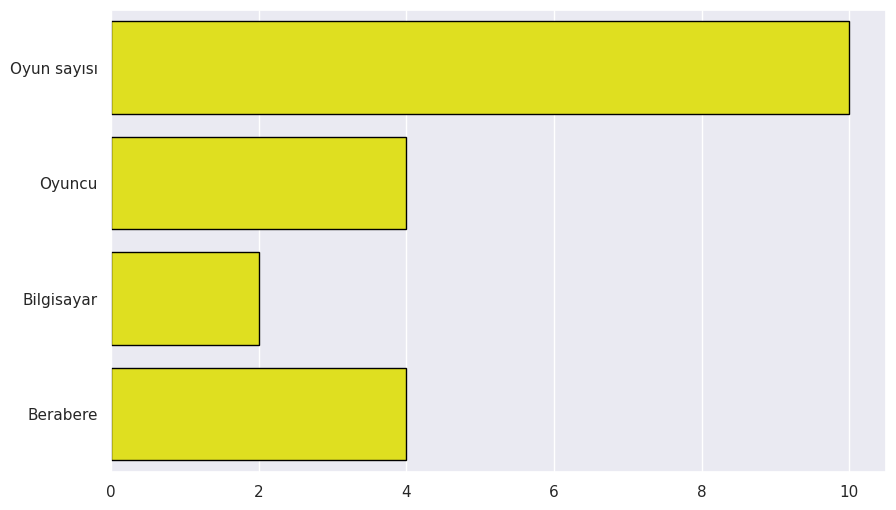

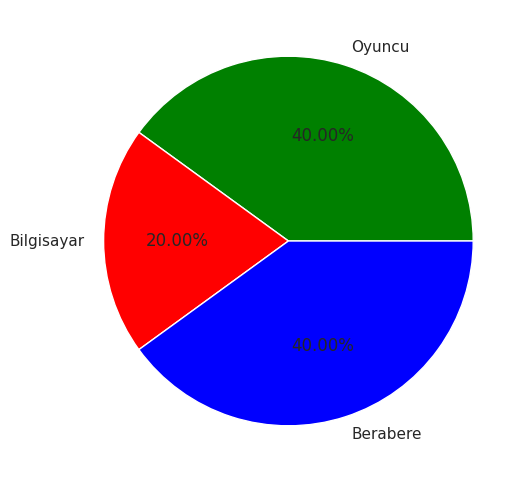

In [ ]:
tas_kagit_makas_ozgurumutpirinc()